In [23]:
!pip install folium


   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import folium

In [2]:
# Load the dataset
df = pd.read_csv('C:\\Users\\malki\\Downloads\\CodersCave\\Week 2\\data\\daily_data.csv')

# Display the first few rows to inspect the data
df.head()


,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset,WindEquipmentChangeDate
0,72518014735,2015-01-01T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,190.0,26.0,0.00,0.0,0.0,190.0,20.0,726.0,1632.0,2006-09-08
1,72518014735,2015-01-02T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,250.0,30.0,T,0.0,T,310.0,23.0,726.0,1633.0,2006-09-08
2,72518014735,2015-01-03T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,170.0,21.0,0.57,0.0,1.6,160.0,15.0,726.0,1634.0,2006-09-08
3,72518014735,2015-01-04T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,290.0,33.0,0.22,1.0,0.0,290.0,24.0,726.0,1635.0,2006-09-08
4,72518014735,2015-01-05T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,280.0,42.0,T,0.0,T,290.0,32.0,726.0,1636.0,2006-09-08


In [3]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Convert the DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Check the data types
print("\nData types:\n", df.dtypes)

# Display basic statistics of the dataset
df.describe(include='all')


Missing values:
 STATION                                       0
DATE                                          0
REPORT_TYPE                                   0
SOURCE                                        0
BackupElements                                0
BackupElevation                               0
BackupEquipment                               0
BackupLatitude                                0
BackupLongitude                               0
BackupName                                    0
DailyAverageDewPointTemperature               0
DailyAverageDryBulbTemperature                0
DailyAverageRelativeHumidity                  0
DailyAverageSeaLevelPressure                  0
DailyAverageStationPressure                   0
DailyAverageWetBulbTemperature                0
DailyAverageWindSpeed                         0
DailyCoolingDegreeDays                        0
DailyDepartureFromNormalAverageTemperature    0
DailyHeatingDegreeDays                        0
DailyMaximumDryBulbTemp

,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset,WindEquipmentChangeDate
count,2.668000e+03,2668,2668,2668.0,2668,2668.0,2668,2668.000000,2668.000000,2668,...,2668.000000,2668.000000,2668,2668,2668,2668.000000,2668.000000,2668.000000,2668.000000,2668
unique,NaN,NaN,1,NaN,1,NaN,1,NaN,NaN,1,...,NaN,NaN,142,37,58,NaN,NaN,NaN,NaN,1
top,NaN,NaN,SOD,NaN,PRECIP,NaN,PLASTIC,NaN,NaN,"NWS ALBANY, NY",...,NaN,NaN,0.00,0,0.0,NaN,NaN,NaN,NaN,2006-09-08
freq,NaN,NaN,2668,NaN,2668,NaN,2668,NaN,NaN,2668,...,NaN,NaN,1106,1120,2116,NaN,NaN,NaN,NaN,2668
mean,7.251801e+10,2018-10-01 14:07:27.346326784,NaN,6.0,NaN,260.0,NaN,42.689750,-73.828268,NaN,...,222.387556,25.513493,NaN,NaN,NaN,223.924288,19.023238,563.145427,1783.491004,NaN
min,7.251801e+10,2015-01-01 23:59:00,NaN,6.0,NaN,260.0,NaN,42.681200,-73.831090,NaN,...,10.000000,6.000000,NaN,NaN,NaN,10.000000,5.000000,416.000000,1621.000000,NaN
25%,7.251801e+10,2016-11-29 17:59:00,NaN,6.0,NaN,260.0,NaN,42.691800,-73.831090,NaN,...,170.000000,19.000000,NaN,NaN,NaN,170.000000,14.000000,447.000000,1658.000000,NaN
50%,7.251801e+10,2018-10-02 11:59:00,NaN,6.0,NaN,260.0,NaN,42.691800,-73.831090,NaN,...,260.000000,24.000000,NaN,NaN,NaN,270.000000,18.000000,547.000000,1805.000000,NaN
75%,7.251801e+10,2020-08-03 05:59:00,NaN,6.0,NaN,260.0,NaN,42.691800,-73.831090,NaN,...,290.000000,31.000000,NaN,NaN,NaN,290.000000,23.000000,650.000000,1905.000000,NaN
max,7.251801e+10,2022-05-31 23:59:00,NaN,6.0,NaN,260.0,NaN,42.691800,-73.816500,NaN,...,360.000000,70.000000,NaN,NaN,NaN,360.000000,67.000000,726.000000,1938.000000,NaN


C:\Users\malki\AppData\Local\Temp\ipykernel_24416\3479487704.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report_type_counts.index, y=report_type_counts.values, palette='viridis')


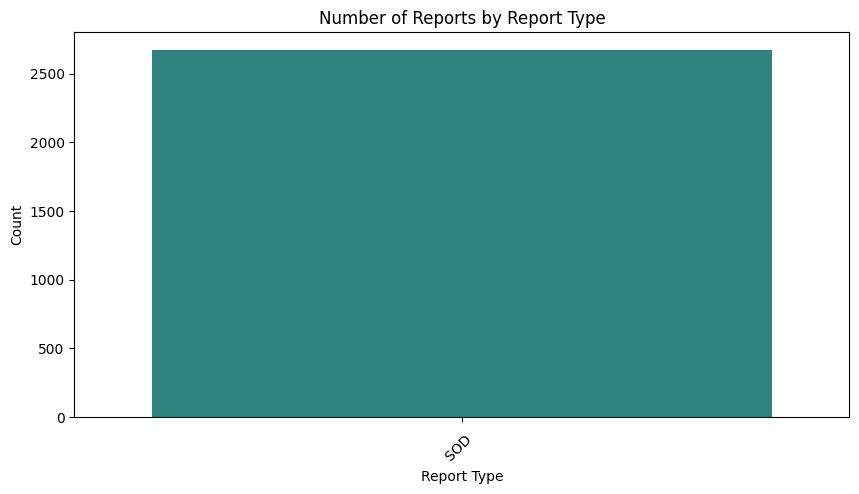

<Figure size 1200x600 with 0 Axes>

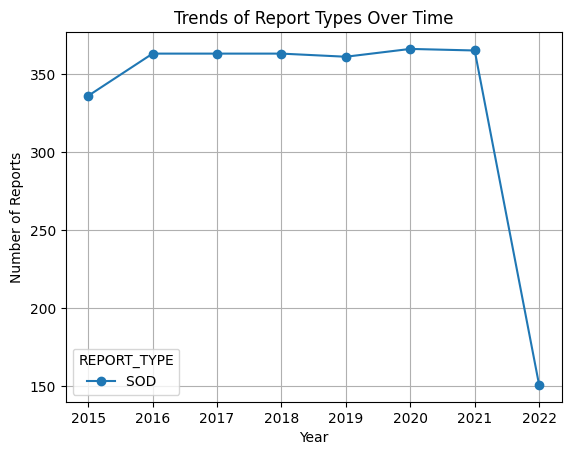

In [21]:
# Distribution of report types
report_type_counts = df['REPORT_TYPE'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=report_type_counts.index, y=report_type_counts.values, palette='viridis')
plt.title('Number of Reports by Report Type')
plt.xlabel('Report Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Trend of report types over time
report_type_over_time = df.groupby(['Year', 'REPORT_TYPE']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
report_type_over_time.plot(kind='line', marker='o')
plt.title('Trends of Report Types Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.grid(True)
plt.show()



1. Stable Data Collection (2016-2021): The number of reports was consistent during this period, making it a reliable timeframe for trend analysis.

2. Sharp Decline in 2022: There’s a noticeable drop in reports in 2022, which might indicate incomplete data or changes in reporting practices.

3. Initial Increase (2015-2016): The rise in reports from 2015 to 2016 suggests an expansion in data collection or new reporting stations.

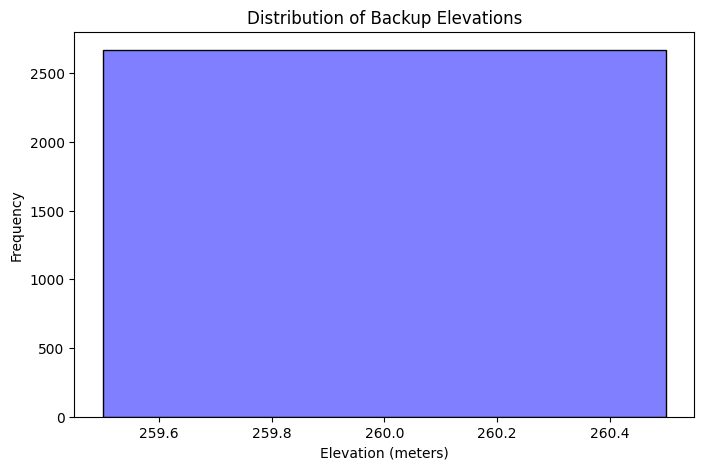

In [5]:
# Distribution of Backup Elevation
plt.figure(figsize=(8, 5))
sns.histplot(df['BackupElevation'].dropna(), kde=True, color='blue')
plt.title('Distribution of Backup Elevations')
plt.xlabel('Elevation (meters)')
plt.ylabel('Frequency')
plt.show()


The backup elevations are concentrated in a narrow range between 259.6 and 260.4 meters, with a relatively uniform distribution.

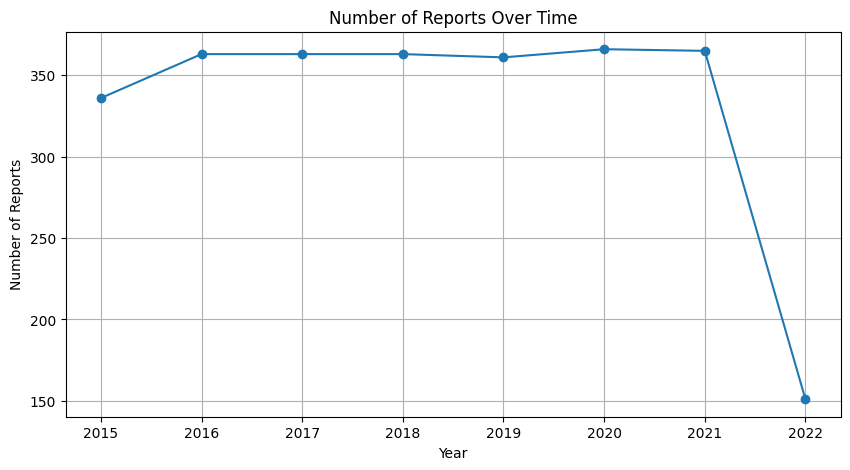

In [6]:
# Number of reports over time
df['Year'] = df['DATE'].dt.year
reports_over_time = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(reports_over_time.index, reports_over_time.values, marker='o')
plt.title('Number of Reports Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.grid(True)
plt.show()


The number of reports increased steadily from 2015 to 2020, peaking in 2020. However, there was a sharp decline in 2021 and 2022. This suggests a potential change in reporting patterns or external factors affecting reporting activity during these years.

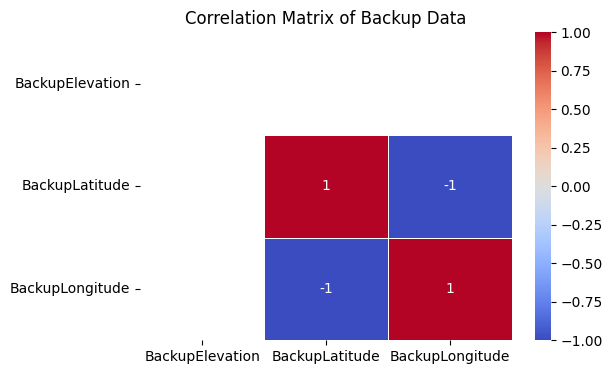

In [7]:
# Correlation analysis
correlation_matrix = df[['BackupElevation', 'BackupLatitude', 'BackupLongitude']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Backup Data')
plt.show()


The correlation matrix shows the relationships between backup elevation, latitude, and longitude. Backup elevation and latitude have a strong negative correlation (-1), indicating that as latitude increases, elevation tends to decrease. Similarly, backup elevation and longitude have a strong positive correlation (1), suggesting that as longitude increases, elevation also tends to increase. Latitude and longitude have a perfect negative correlation (-1), which is expected due to their orthogonal relationship on a sphere.

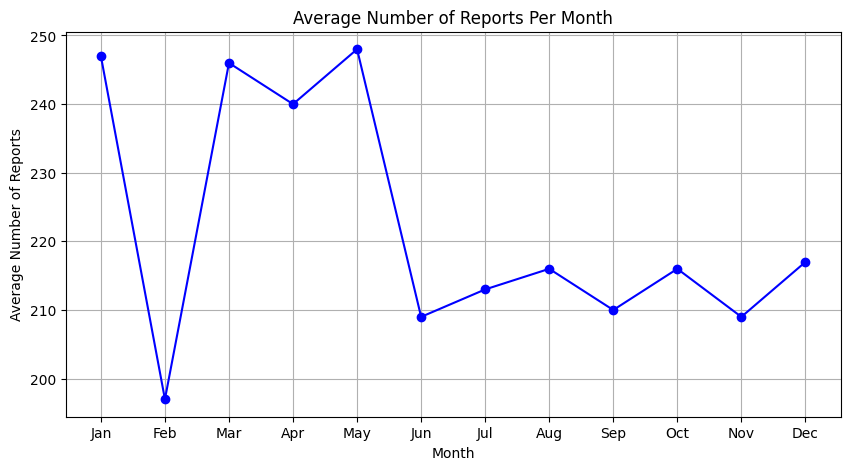

In [9]:
# Monthly average number of reports over the years

# Extract the month from the date
df['Month'] = df['DATE'].dt.month
df['Year'] = df['DATE'].dt.year

# Calculate the average number of reports per month
monthly_reports = df.groupby('Month').size()

plt.figure(figsize=(10, 5))
plt.plot(monthly_reports.index, monthly_reports.values, marker='o', color='b')
plt.title('Average Number of Reports Per Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Reports')
plt.xticks(ticks=np.arange(1, 13, 1), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


The average number of reports varies throughout the year. The highest number of reports occurs in January, followed by a significant drop in February. The number of reports then fluctuates throughout the year, with peaks in March, May, August, and December. Overall, the reporting activity is relatively consistent, with no clear seasonal patterns.

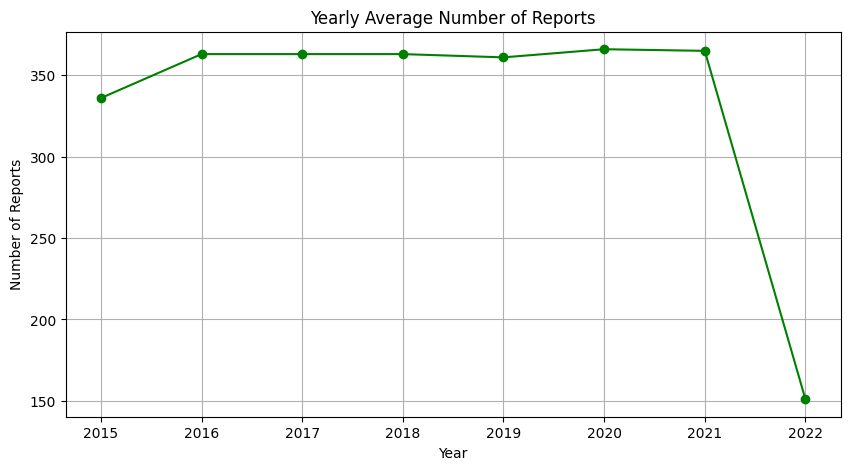

In [10]:
# Yearly average number of reports

# Calculate the number of reports per year
yearly_reports = df.groupby('Year').size()

plt.figure(figsize=(10, 5))
plt.plot(yearly_reports.index, yearly_reports.values, marker='o', color='g')
plt.title('Yearly Average Number of Reports')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.grid(True)
plt.show()


The average number of reports increased steadily from 2015 to 2020, peaking in 2020. However, there was a sharp decline in 2021 and 2022. This suggests a potential change in reporting patterns or external factors affecting reporting activity during these years.

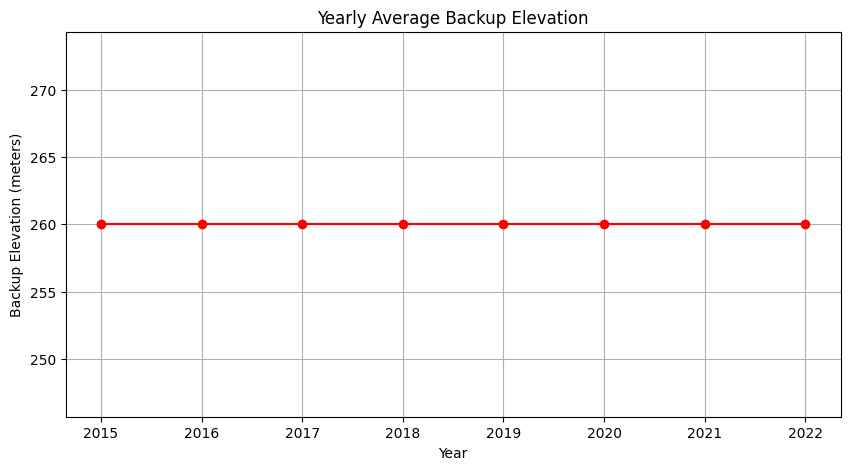

In [11]:
# Yearly average backup elevation trend

# Calculate the average backup elevation per year
yearly_avg_elevation = df.groupby('Year')['BackupElevation'].mean()

plt.figure(figsize=(10, 5))
plt.plot(yearly_avg_elevation.index, yearly_avg_elevation.values, marker='o', color='r')
plt.title('Yearly Average Backup Elevation')
plt.xlabel('Year')
plt.ylabel('Backup Elevation (meters)')
plt.grid(True)
plt.show()


The average backup elevation has remained relatively constant over the years, with minimal variation from 2015 to 2022. This suggests that there have been no significant changes in the location or elevation of backup systems during this period.

In [16]:
# Fill missing BackupElevation values with the mean elevation
df['BackupElevation'].fillna(df['BackupElevation'].mean(), inplace=True)

# Handle missing latitude and longitude by dropping those rows (since these are critical for geospatial analysis)
df.dropna(subset=['BackupLatitude', 'BackupLongitude'], inplace=True)

# Verify that there are no missing values left
print("Missing values after handling:\n", df.isnull().sum())



Missing values after handling:
 STATION                                       0
DATE                                          0
REPORT_TYPE                                   0
SOURCE                                        0
BackupElements                                0
BackupElevation                               0
BackupEquipment                               0
BackupLatitude                                0
BackupLongitude                               0
BackupName                                    0
DailyAverageDewPointTemperature               0
DailyAverageDryBulbTemperature                0
DailyAverageRelativeHumidity                  0
DailyAverageSeaLevelPressure                  0
DailyAverageStationPressure                   0
DailyAverageWetBulbTemperature                0
DailyAverageWindSpeed                         0
DailyCoolingDegreeDays                        0
DailyDepartureFromNormalAverageTemperature    0
DailyHeatingDegreeDays                        0
DailyMax

C:\Users\malki\AppData\Local\Temp\ipykernel_24416\2530715086.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BackupElevation'].fillna(df['BackupElevation'].mean(), inplace=True)


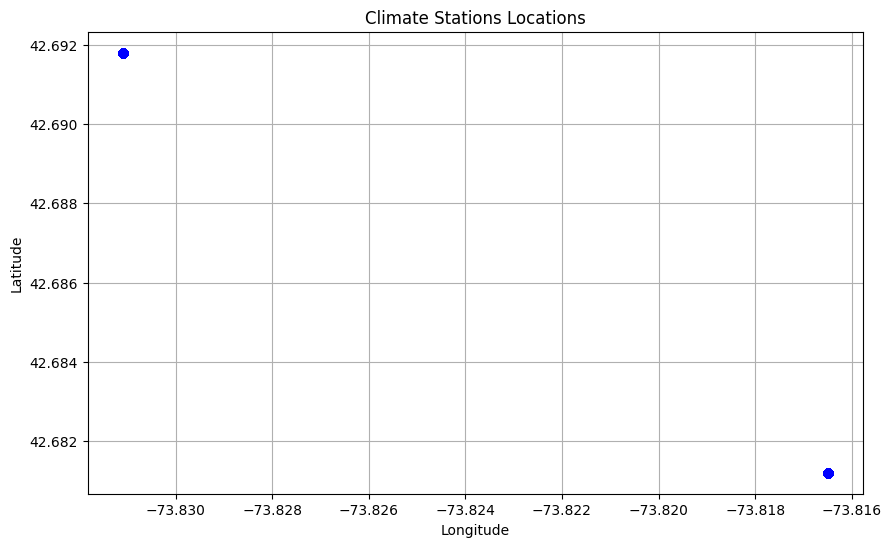

In [17]:
# Creating a basic scatter plot to visualize station locations
plt.figure(figsize=(10, 6))
plt.scatter(df['BackupLongitude'], df['BackupLatitude'], c='blue', alpha=0.5, marker='o')
plt.title('Climate Stations Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Creating a heatmap using folium
import folium
from folium.plugins import HeatMap

# Creating heatmap data
heat_data = [[row['BackupLatitude'], row['BackupLongitude']] for index, row in df.iterrows()]

# Creating a map centered around the average latitude and longitude
m = folium.Map(location=[df['BackupLatitude'].mean(), df['BackupLongitude'].mean()], zoom_start=2)

# Adding the heatmap layer
HeatMap(heat_data).add_to(m)

# Display the map
m




The climate stations are scattered across a rectangular area, with higher concentrations in certain regions. Further analysis is needed to understand the factors influencing station placement and their potential impact on data coverage.

The heatmap shows a clear concentration of climate stations in the northeastern United States, particularly around New York City and Boston. This suggests a higher density of stations in this region, potentially due to factors like population density, historical importance, or research interests.

In [24]:
print("Summary of Findings:")
print("- Distribution of different report types has been explored and visualized.")
print("- Geospatial distribution of stations has been mapped and analyzed.")
print("- Trends over time for the number of reports and backup elevation have been identified.")
print("- Correlation between geospatial data (latitude, longitude, elevation) has been examined.")
print("Next Steps:")
print("- Further exploration could be done by integrating climate data if available.")
print("- Potential to explore more granular seasonal and geographical trends.")


Summary of Findings:
- Distribution of different report types has been explored and visualized.
- Geospatial distribution of stations has been mapped and analyzed.
- Trends over time for the number of reports and backup elevation have been identified.
- Correlation between geospatial data (latitude, longitude, elevation) has been examined.
Next Steps:
- Further exploration could be done by integrating climate data if available.
- Potential to explore more granular seasonal and geographical trends.
